**Project: Cross Validation**

**To-Do: The data set is comprised of 205 observations and 26 attributes. Please refer to the UCI web page for further details on these variables. The curb-weightvariable will serve as the response variable for your regression model. The explanatory variables you may choose from are as follows: height, width, length, wheel-base, engine-size, horsepower, peak-rpm,and city-mpg.  All other attributes contained within the data set should be ignoredfor this Assignment.**

In [111]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tarfile

In [112]:
#Loading the Data from Github Repository
username = "harisx91"
path = "DataScience_DAV6150_Fall2021/main/Module_2/M2_Data.csv"
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

In [113]:
#Looking at what our data looks like
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [114]:
#Renaming the columns based on what was provided on the website for each column

df.columns = ['Symboling','Normalized-losses','Make','Fuel-type','Aspiration','Num-of-doors','Body-style','Drive-wheels','Engine-location','Wheel-base','Length','Width','Height','Curb-weight','Engine-type','Num-of-cylinders','Engine-size',' Fuel-system','Bore','Stroke','Compression-ratio','Horsepower','Peak-rpm','City-mpg','Highway-mpg','Price']

In [115]:
#Colujmns are named correctly
df.head()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [116]:
#Looking at what opur data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          204 non-null    int64  
 1   Normalized-losses  204 non-null    object 
 2   Make               204 non-null    object 
 3   Fuel-type          204 non-null    object 
 4   Aspiration         204 non-null    object 
 5   Num-of-doors       204 non-null    object 
 6   Body-style         204 non-null    object 
 7   Drive-wheels       204 non-null    object 
 8   Engine-location    204 non-null    object 
 9   Wheel-base         204 non-null    float64
 10  Length             204 non-null    float64
 11  Width              204 non-null    float64
 12  Height             204 non-null    float64
 13  Curb-weight        204 non-null    int64  
 14  Engine-type        204 non-null    object 
 15  Num-of-cylinders   204 non-null    object 
 16  Engine-size        204 non

In [94]:
#How many values are contained and many columns
df.shape

(204, 26)

In [117]:
#Dropping the columns that are not needed
df = df.drop(columns=["Symboling","Normalized-losses","Make",
                     "Fuel-type","Aspiration","Num-of-doors",
                     "Body-style","Drive-wheels","Engine-location",
                     "Engine-type","Num-of-cylinders",
                     "Bore","Stroke","Compression-ratio","Highway-mpg",
                     "Price"])

In [118]:
#Data after dropping the columns that are not being used for this project
df.head()

,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Fuel-system,Horsepower,Peak-rpm,City-mpg
0,88.6,168.8,64.1,48.8,2548,130,mpfi,111,5000,21
1,94.5,171.2,65.5,52.4,2823,152,mpfi,154,5000,19
2,99.8,176.6,66.2,54.3,2337,109,mpfi,102,5500,24
3,99.4,176.6,66.4,54.3,2824,136,mpfi,115,5500,18
4,99.8,177.3,66.3,53.1,2507,136,mpfi,110,5500,19


In [119]:
#Statistical Analysis of our data
df.describe()

,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,City-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,25.240196
std,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,6.551513
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,13.000000
25%,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,19.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,24.000000
75%,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,30.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,49.000000


**Conclussion: We have the mean, standard deviated, min and max for each attribute now let's Visually look at each variable using Box-Plot**

In [120]:
#Looking for any null values in the data
df.isnull().sum()

Wheel-base      0
Length          0
Width           0
Height          0
Curb-weight     0
Engine-size     0
 Fuel-system    0
Horsepower      0
Peak-rpm        0
City-mpg        0
dtype: int64

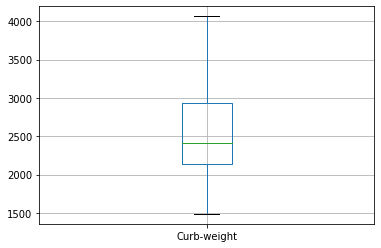

In [121]:
Curb_Weight = df[['Curb-weight']]
CW = Curb_Weight.boxplot()

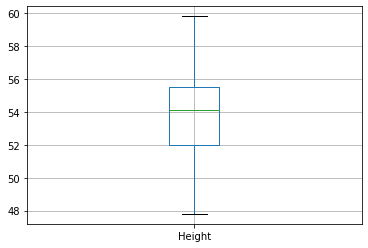

In [122]:
Height = df[["Height"]]
H = Height.boxplot()

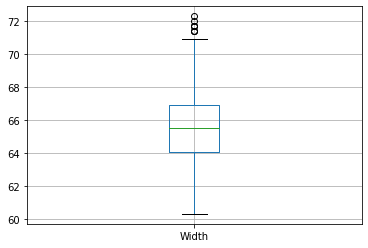

In [123]:
Width = df[["Width"]]
W = Width.boxplot()

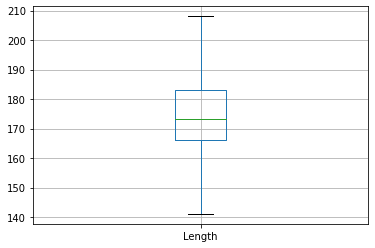

In [124]:
Length = df[["Length"]]
L = Length.boxplot()

Model 1

In [125]:
# get chosen attributes and response attributes
Model_1 = df[['Curb-weight','Height','Width','Length','Horsepower']]
Model_1.rename(columns = {'Curb-weight':'Curbweight'},inplace = True)
# creating X & Y
y = Model_1.Curbweight
x = Model_1.copy()

/Users/harisx91/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [126]:
# remove the response attribute from x
x.drop('Curbweight', axis=1, inplace=True)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# split the data into training and testing subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [129]:
len(x_train)

163

In [130]:
len(x_test)

41

In [131]:
# load sklearn_datasets and sklearn_svm library
from sklearn import datasets
from sklearn import svm

In [132]:
#check the results
x_test.shape, y_test.shape

((41, 4), (41,))

In [133]:
# Let's check the results
x_train.shape, y_train.shape

((163, 4), (163,))

In [134]:
# Adding the model function
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv = 3)

/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/harisx91/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py", line 803, in check_X_y
    e

ValueError: could not convert string to float: '?'